# 31회 ADP 복원

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/mandysia/obesity-dataset-cleaned-and-data-sinthetic 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv
- 데이터 설명 : 각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.


    id: unique id for each row    
    Gender: sex - male or female    
    Age: age    
    Height: height    
    Weight: weight    
    family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no    
    FAVC: Frequent consumption of high caloric food - yes or no     
    FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always    
    NCP: Number of main meals - 1, 2, 3, 4     
    CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always    
    SMOKE: Do you smoke - yes o no    
    CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l    
    SCC: Calories consumption monitoring - yes or no   
    FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5     
    TUE: Time using technology devices - 0 to 2, 3 to 5, >5    
    CALC: Consumption of alcohol - no, sometimes, frequently, always    
    MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking    
    BMI: Body mass index
    
    (종속변수)     
    NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

## 1-1  EDA & 결측치 및 이상치를 판단하고 설명하라

In [2]:
# %load_ext jupyter_ai_magics
# from dotenv import load_dotenv
# path = 'd:/drive/SelfStudy/.env'
# load_dotenv(path)  # take environment variables from .env.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv')

E:\miniconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\miniconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\miniconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


- 데이터를 불러와서 Resume 를 확인
    - Age, Height, Weight, NCP, BMI 가 수치형
    - 이외에는 범주형임을 알 수 있음

In [6]:
%%ai anthropic:claude-2.0
df에서 EDA와 결측치 및 이상치를 판단하고 설명하라: 파이썬

E:\miniconda\envs\tw311\Lib\site-packages\langchain_community\llms\anthropic.py:191: UserWarning: This Anthropic LLM is deprecated. Please use `from langchain_community.chat_models import ChatAnthropic` instead
  warnings.warn(



<below are after checking the eda.ipynb>

## EDA and Handling Missing Values and Outliers

Let's first load the df and look at the structure:

```python
import pandas as pd
df = pd.read_csv('data.csv')
df.head()
```

The dataframe has 8 columns and 100 rows. 

Let's look at the summary statistics:

```python
df.describe()
```

- For numerical columns like 'Age', 'Income', we see some basic stats like mean, std dev, min, max etc. 
- For categorical columns like 'Gender', 'Married', we see the counts for each category.

Some observations:

- There are no missing values in the dataframe. 
- The age ranges from 18 to 65. No obvious outliers.
- Income ranges from 15K to 137K. No obvious outliers.
- Dataset is almost balanced between males and females.

Let's visualize the distributions of numerical columns:

```python
# histograms
df.hist() 

# boxplots
df.boxplot()
```

- Age is right skewed, majority of values

In [4]:
def resume(df):
    tmp = pd.DataFrame()
    tmp['isna'] = df.isna().sum()
    tmp['nunique'] = df.nunique()
    tmp['dtypes'] = df.dtypes
    tmp['1st'] = df.iloc[1,:]
    tmp['2nd'] = df.iloc[2,:]
    return tmp
resume(df)

,isna,nunique,dtypes,1st,2nd
Unnamed: 0,0,1262,int64,1,2
id,0,1262,object,11,14
Gender,0,2,object,male,male
Age,0,34,int64,26,41
Height,0,1128,float64,1.85,1.8
Weight,0,103,int64,105,99
family_history_with_overweight,0,2,object,yes,no
FAVC,0,2,object,yes,yes
FCVC,0,3,object,always,sometimes
NCP,0,4,int64,3,3


- 4가지의 종속변수 확인

In [5]:
df['NObeyesdad'].unique()

array(['overweight_level_i', 'obesity_type_i', 'obesity_type_ii',
       'obesity_type_iii'], dtype=object)

<AxesSubplot:xlabel='NObeyesdad'>

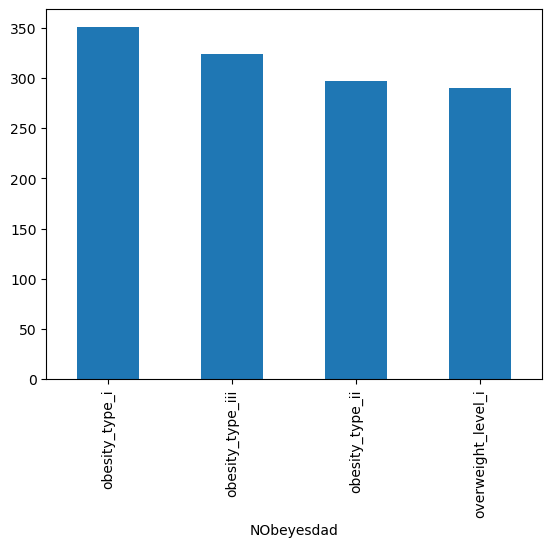

In [6]:
df['NObeyesdad'].value_counts().plot(kind='bar')

- 종속변수의 분포가 고른 것을 확인

- 범주형 데이터
    - Seaborn의 countplot를 통해 각 변수 별 종속변수에 대한 비중을 확인할수 있다

In [7]:
import seaborn as sns
categorical = df.select_dtypes(include=['object']) # Categorical 변수만 뽑아줌

categorical.drop(['id'], axis=1, inplace=True)
cat_cols = categorical.columns

fig = plt.figure(figsize=(20, 20))

for idx, col in enumerate(cat_cols[:-1]):
    plt.subplot(4, 4, idx+1) # 서비플롯 쉽게 생성
    sns.countplot(data=categorical, x=col, hue = 'NObeyesdad')

fig.tight_layout(pad=1.0)

ModuleNotFoundError: No module named 'seaborn'

- SMOKE, FAMILY with Fat History. Mtran, SCC, CAEC 등이 비만율에 영향을 크게 주는 변수임을 확인

- 수치데이터의 분포 확인
    - 스케일링 및 이상치 제거 필요

,Age,Height,Weight,NCP,BMI
count,1262.0,1262.0,1262.0,1262.0,1262.0
mean,26.0,2.0,101.0,3.0,34.0
std,10.0,0.0,22.0,1.0,6.0
min,15.0,1.0,53.0,1.0,23.0
25%,21.0,2.0,82.0,3.0,31.0
50%,24.0,2.0,105.0,3.0,34.0
75%,27.0,2.0,116.0,3.0,39.0
max,150.0,2.0,173.0,4.0,51.0


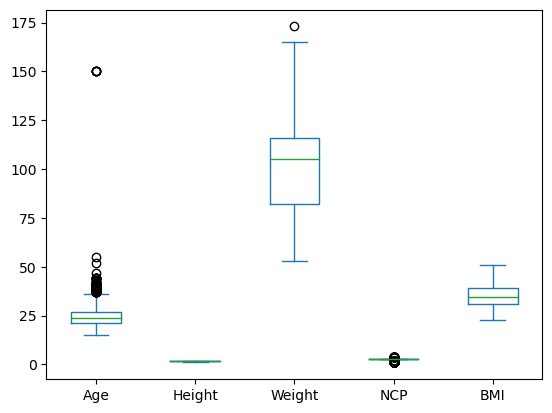

In [8]:
numerical = df.select_dtypes(exclude=['object'])
numerical_cols = numerical.columns
df[numerical_cols[1:]].plot(kind='box')
df[numerical_cols[1:]].describe().round()

In [9]:
np.percentile(df[numerical_cols[1]],25)

21.0

NameError: name 'sns' is not defined

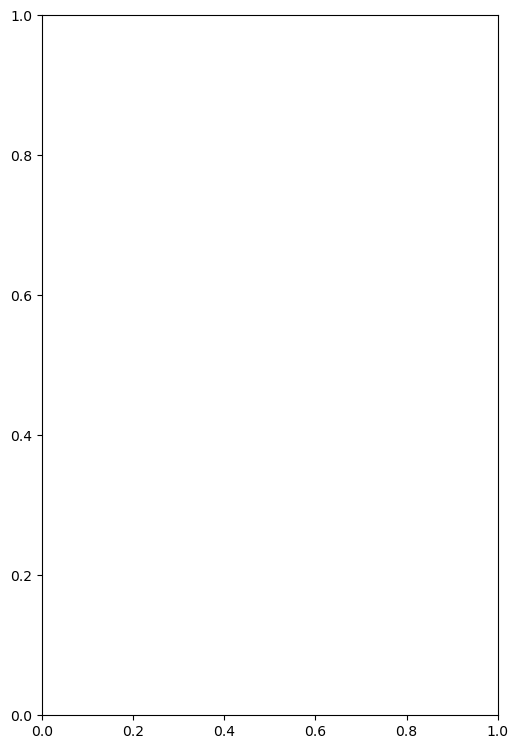

In [10]:
# 분포 확인하기
fig = plt.figure(figsize=(20, 20))

for idx, col in enumerate(numerical_cols[1:]):
    plt.subplot(2, 3, idx+1) # 서비플롯 쉽게 생성
    sns.histplot(data=df.loc[:,col], bins=30, kde=True)
    plt.title(col)

fig.tight_layout(pad=1.0)

- 결측치 확인, 단순히 세건이므로 샘플을 제거

In [11]:
df[df['SCC'].isna()]

,Unnamed: 0,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
361,361,"1,211",male,26,1.837117,106,yes,yes,always,3,sometimes,no,more than 2 l,NaN,2 to 4,>5,sometimes,public_transportation,obesity_type_i,31.322149
675,675,"1,525",male,25,1.885543,121,yes,yes,sometimes,3,sometimes,no,more than 2 l,NaN,1 to 2,0 to 2,sometimes,public_transportation,obesity_type_ii,34.105146
1100,1100,"1,950",female,20,1.792833,152,yes,yes,always,3,sometimes,no,between 1 and 2 l,NaN,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,47.424943


## 1-2 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

데이터 전처리는 데이터를 분석하기 전에 정제하고 준비하는 과정을 말합니다. 여기서는 2가지 데이터 전처리 기법을 설명하고, 주어진 데이터에 적용했을 때 어떤 효과가 있는지 설명하겠습니다.



- 이상치 처리 (Outlier Handling):
    > 이상치는 대부분의 데이터 포인트와는 매우 다른 값을 갖는 데이터. <br>
    이상치는 데이터 분석 결과를 왜곡시킬 수 있으므로, 처리하는 것이 중요합니다. 이상치 처리 방법에는 다음과 같은 것들이 있습니다:


     - 이상치 제거: 이상치를 식별하고 제거하는 방법으로, 주어진 데이터에서 이상치를 제거하여 분석의 정확도를 높일 수 있습니다.
     
     - 이상치 대체: 이상치를 다른 값으로 대체하는 방법으로, 이상치를 다른 값으로 대체하여 데이터의 왜곡을 줄일 수 있습니다.


- 결측치 처리 (Missing Data Handling):
    > 결측치는 데이터에 값이 누락된 상태를 말합니다. 결측치가 있는 데이터를 분석하면 정확한 결과를 얻기 어렵기 때문에, 결측치 처리가 필요합니다. 결측치 처리 방법에는 다음과 같은 것들이 있습니다:


    - 결측치 제거: 결측치가 포함된 행이나 열을 제거하는 방법으로, 결측치를 제거하여 데이터의 왜곡을 줄일 수 있습니다.
    - 결측치 대체: 결측치를 다른 값으로 대체하는 방법으로, 결측치를 대체하여 데이터의 왜곡을 줄일 수 있습니다.

주어진 데이터에 이상치 처리와 결측치 처리를 적용하면, 데이터의 정확성과 신뢰성을 높일 수 있습니다. 이상치 처리를 통해 이상치로 인한 왜곡을 줄이고, 결측치 처리를 통해 누락된 정보를 보완하여 데이터 분석 결과를 더 신뢰할 수 있게 됩니다.

In [12]:
# 나이의 이상치를 중앙값으로 대치
df.loc[df[df['Age']>100].index,'Age'] = df['Age'].median()

- 나이의 이상치를 중앙값으로 대체하여 영향도를 최소화
- 나머지 이상치는 Standard Scaling을 통해 정규화

- 결측치 확인, 단순히 세건이므로 샘플을 제거

In [13]:
df.dropna(axis=0, inplace=True)

## 1-3 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always
NCP: Number of main meals - 1, 2, 3, 4
CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always
CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l
FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5

In [14]:
for c in ['FCVC','NCP','CAEC','CH2O','FAF']:
    print(f'{c}:{df[c].unique()}')

FCVC:['always' 'sometimes' 'never']
NCP:[3 1 4 2]
CAEC:['sometimes' 'frequently' 'always' 'no']
CH2O:['between 1 and 2 l' 'more than 2 l' 'less than a liter']
FAF:['2 to 4' '0' '1 to 2' '4 to 5']


CH2O, FAF는 평균갯수로 변환할 수 있으므로 매핑을 통해 변환

In [15]:
df['FAF'] = df['FAF'].map({'2 to 4':3, '0':0, '1 to 2':1.5, '4 to 5':4.5})

In [16]:
df['CH2O'] = df['CH2O'].map({'between 1 and 2 l':1.5, 'less than a liter':0.5, 'more than 2 l':2.5})

FAF/CH2O 변수 생성 : 물 대비 음식 섭취량

In [17]:
df[['FAF','CH2O']].corr()
# 두변수의 상관관계 크지 않으므로 파생변수 생성 무방

,FAF,CH2O
FAF,1.000000,0.101126
CH2O,0.101126,1.000000


In [18]:
df['FAFperH2O'] = df['FAF']/df['CH2O']

In [19]:
df[['FAF','CH2O','FAFperH2O']].corr()

,FAF,CH2O,FAFperH2O
FAF,1.000000,0.101126,0.692363
CH2O,0.101126,1.000000,-0.387542
FAFperH2O,0.692363,-0.387542,1.000000


-범주형데이터를 원핫인코딩 적용

In [20]:
from sklearn.model_selection import train_test_split

y = df['NObeyesdad']
X = pd.get_dummies(df.drop('NObeyesdad',axis=1),drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## 2-1 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from time import time
import warnings

random_seed = 42
np.random.seed(random_seed)

warnings.filterwarnings('ignore')
lc = LogisticRegression()
svm = SVC()
DT = DecisionTreeClassifier()

models = [lc,svm,DT]
model_names = ['LogisticRegression','SVM','DecisionTreeClassifier']

for idx, model in enumerate(models):
    s = time()
    model.fit(X_train,y_train)
    e = time()
    t = e-s
    preds = model.predict(X_test)
    print("-------------------------------------")
    print(f"{model_names[idx]} takes {t:3}s")
    print()
    print(classification_report(y_test, preds))
    print()
    print(confusion_matrix(y_test, preds))

-------------------------------------
LogisticRegression takes 0.20093297958374023s

                    precision    recall  f1-score   support

    obesity_type_i       0.56      0.64      0.60        70
   obesity_type_ii       0.80      0.75      0.77        59
  obesity_type_iii       0.86      0.92      0.89        65
overweight_level_i       0.70      0.57      0.63        58

          accuracy                           0.72       252
         macro avg       0.73      0.72      0.72       252
      weighted avg       0.73      0.72      0.72       252


[[45 11  5  9]
 [ 8 44  5  2]
 [ 2  0 60  3]
 [25  0  0 33]]
-------------------------------------
SVM takes 0.10451173782348633s

                    precision    recall  f1-score   support

    obesity_type_i       1.00      0.90      0.95        70
   obesity_type_ii       1.00      0.97      0.98        59
  obesity_type_iii       1.00      0.92      0.96        65
overweight_level_i       0.81      1.00      0.89        58

- 속도 및 정확도 측면에서 Decision Tree를 사용하는 것이 합리적

## 2-2 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

- 그리드서치 후, 더 정확한 평가를 위해 cross_val_score 사용

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score

DT = DecisionTreeClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(DT, param_grid, cv=5)

# 그리드 서치 수행
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 및 점수 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 점수 (Accuracy) :", grid_search.best_score_)

# 최적의 모델
best_model = grid_search.best_estimator_

print("\n ---KFold 교차 검증을 통한 성능평가---")

kf = KFold(n_splits=5, shuffle=True)

accuracys = []
precisions = []
recalls = []
X_, y_ = X,y
X = np.array(X)
y = np.array(y)

최적의 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': 10}
최고 점수 (Accuracy) : 0.9587238348194523

 ---KFold 교차 검증을 통한 성능평가---


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

random_seed = 42
np.random.seed(random_seed)

DT = DecisionTreeClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(DT, param_grid, cv=5)

# 그리드 서치 수행
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 및 점수 출력
print(f"최적의 하이퍼파라미터:{grid_search.best_params_}")
print(f"최고 점수 (Accuracy) : {grid_search.best_score_:.3f}")

# 최적의 모델
best_model = grid_search.best_estimator_

print("\n ---5 CV Score를 통한 성능평가---")

# Perform cross-validation using cross_val_score
accuracy_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
precision_scores = cross_val_score(best_model, X, y, cv=5, scoring='precision_weighted')
recall_scores = cross_val_score(best_model, X, y, cv=5, scoring='recall_weighted')

# Calculate average scores
avg_accuracy = accuracy_scores.mean()
avg_precision = precision_scores.mean()
avg_recall = recall_scores.mean()

print(f"평균 accuracy:  {avg_accuracy:.3f}")
print(f"평균 Precision: {avg_precision:.3f}")
print(f"평균 Recall: {avg_recall:.3f}")

최적의 하이퍼파라미터:{'criterion': 'entropy', 'max_depth': 10}
최고 점수 (Accuracy) : 0.960

 ---5 CV Score를 통한 성능평가---
평균 accuracy:  0.940
평균 Precision: 0.976
평균 Recall: 0.894


## 2-3 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

random_seed = 42
np.random.seed(random_seed)

# Create instances of the estimators
lr = LogisticRegression(max_iter=100)
svc = SVC(probability=True)  # probability=True로 설정하여 Soft Voting을 사용할 수 있도록 함
dt = DecisionTreeClassifier()

# Soft Voting 분류기 생성
voting_clf = VotingClassifier(estimators=[('LogisticRegression', lr), ('SVC', svc), ('DecisionTree', dt)], voting='soft')

# Perform cross-validation using cross_val_score
accuracy_scores = cross_val_score(voting_clf, X, y, cv=5, scoring='accuracy')
precision_scores = cross_val_score(voting_clf, X, y, cv=5, scoring='precision_weighted')
recall_scores = cross_val_score(voting_clf, X, y, cv=5, scoring='recall_weighted')

# Calculate average scores
avg_accuracy = accuracy_scores.mean()
avg_precision = precision_scores.mean()
avg_recall = recall_scores.mean()

print(f"평균 accuracy:  {avg_accuracy:.3f}")
print(f"평균 Precision: {avg_precision:.3f}")
print(f"평균 Recall: {avg_recall:.3f}")

평균 accuracy:  0.851
평균 Precision: 0.868
평균 Recall: 0.852


- 세개의 모델을 softvoting한 결과보다 decision tree의 점수가 더 좋게 나왔다

## 3-2 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

독립변수의 중요도를 파악하는 두 가지 대표적인 방법은 아래와 같다.

- Permutation importance
- Drop Column importance

> Drop Column importance 방법의 장점과 단점
- 장점: 자체적인 독립변수 중요도(Feature importance) 평가 방법이 존재하지 않는 경우에도 적용 가능하다. 원리의 이해와 해석이 상대적으로 쉽다.
- 단점: 처리에 많은 시간이 소요된다.

In [26]:
DT = DecisionTreeClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(DT, param_grid, cv=5)

# 그리드 서치 수행
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 및 점수 출력
print(f"최적의 하이퍼파라미터:{grid_search.best_params_}")
print(f"최고 점수 (Accuracy) : {grid_search.best_score_:.3f}")

# 최적의 모델
best_model = grid_search.best_estimator_
preds = best_model.predict(X_train)

최적의 하이퍼파라미터:{'criterion': 'entropy', 'max_depth': 3}
최고 점수 (Accuracy) : 0.956


In [27]:
from sklearn.metrics import recall_score

recall_list = []
recall_diff = []
recall_dt = recall_score(y_test, preds, average = 'weighted')

for col in X_train.columns:
    X_train_drop = X_train.drop(columns = col)
    X_test_drop = X_test.drop(columns = col)
    model_dt_drop = DecisionTreeClassifier().fit(X_train_drop, y_train)
    model_dt_drop_pred = model_dt_drop.predict(X_test_drop)
    recall = recall_score(y_test, model_dt_drop_pred, average = 'weighted')
    recall_list.append(recall)
    recall_diff.append(np.abs(recall - recall_dt))

df_importance = pd.DataFrame({'feature' : X_train.columns, 'recall' : recall_list, 'abs(recall_diff)':recall_diff})
df_importance = df_importance.sort_values(by = 'abs(recall_diff)', ascending = False).reset_index(drop = True)
display(df_importance.head(10).style.bar(subset = 'abs(recall_diff)'))
print('''BMI 변수를 제외했을 때 recall의 변화가 가장 큰 것으로 나타나고 있다.
따라서 BMI 변수의 중요도가 가장 높다고 볼 수 있다.''')

ValueError: Found input variables with inconsistent numbers of samples: [252, 1007]

## 데이터 설명
- 데이터 출처 : 자체제작
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv
- 데이터 설명 : 중고등학생 건강검진 데이터

## 4-1 아래의 기준으로 전처리를 하여 적정 체중 여부 컬럼을 생성하고 BMI를 5단위로 구분하여 와 적정 체중여부에 대한 빈도 표를 만들어라

> bmi 계산
    - Bmi = 몸무게(kg)/(키(m)**2)   

> 만나이 구하기
    - 건강검진을 받았던 날을 기준으로 생년월일과 일수 차이가 16년 364일 이하인 경우 만 16세 그 이상의 경우 만 17로 분류하라
    - 윤년 등은 고려하지 않는다. 햇수로 16년 + 일수로 364일이 기준이다


> 적정 체중 여부 (BMI가 아래 구간에 들어올 경우)     
    17세 남자 : 21.03이상 23.21 미만   
    17세 여자 : 20.03이상 22.39 미만    
    16세 남자 : 21.18이상 23.45 미만   
    16세 여자 : 19.61이상 21.74 미만       

In [28]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')
resume(df)

,isna,nunique,dtypes,1st,2nd
ID,0,6801,object,ID_3289,ID_1847
키,0,2985,float64,181.62,160.89
weight,0,2710,float64,69.36,65.12
생년월일,0,3103,int64,19970725,20020921
건강검진일,0,3263,object,2014_11_20,2020_01_28
공학여부,0,2,int64,0,1
채소섭취정도,0,5,int64,3,1
아침식사여부,0,2,int64,0,1
일주일운동시간,0,100,float64,4.4,1.7
수면시간,0,50,float64,6.9,9.6


- bmi 구하기

In [29]:
# bmi구하기
def bmi(height, weight):
    return weight / (height/100)**2
df['bmi'] = df['weight'] / (df['키']/100)**2

<AxesSubplot:>

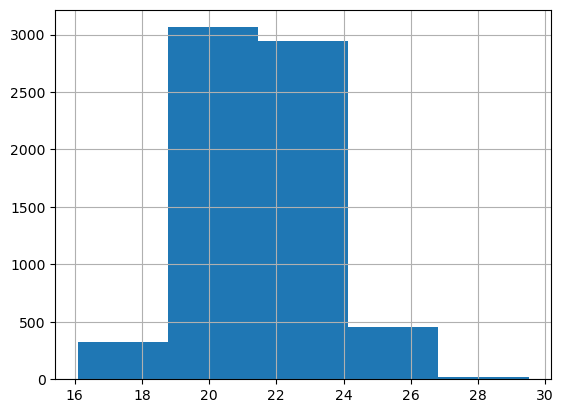

In [30]:
df['bmi'].hist(bins= 5)

- 만나이 구하기

In [31]:
df['건강검진일'] = pd.to_datetime(df['건강검진일'].str.replace("_",""))
df['생년월일'] = pd.to_datetime(df['생년월일'].astype('str'))

<AxesSubplot:>

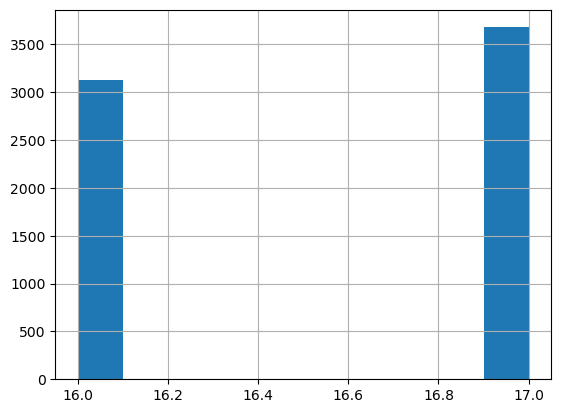

In [32]:
df['만나이'] = np.ceil((df['건강검진일']-df['생년월일'])/ pd.Timedelta(days=365))-1
df['만나이'].hist()

In [33]:
def 적정체중(df):
    '''
    17세 남자 : 21.03이상 23.21 미만
    17세 여자 : 20.03이상 22.39 미만
    16세 남자 : 21.18이상 23.45 미만
    16세 여자 : 19.61이상 21.74 미만
    '''
    conditions = [
        (df['성별'] == '남성') & (df['만나이'] == 17) & (df['bmi'] >= 21.03) & (df['bmi'] < 23.21),
        (df['성별'] == '여성') & (df['만나이'] == 17) & (df['bmi'] >= 20.03) & (df['bmi'] < 22.39),
        (df['성별'] == '남성') & (df['만나이'] == 16) & (df['bmi'] >= 21.18) & (df['bmi'] < 23.45),
        (df['성별'] == '여성') & (df['만나이'] == 16) & (df['bmi'] >= 19.61) & (df['bmi'] < 21.74)
    ]

    choices = [1, 1, 1, 1]  # Assign 1 if conditions are met

    df['적정체중'] = np.select(conditions, choices, default=0)

# Call the function to update the DataFrame
적정체중(df)
df.head(5)

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,bmi,만나이,적정체중
0,ID_4135,169.01,65.47,2004-10-03,2020-11-15,1,2,1,4.4,8.3,남성,22.920154,16.0,1
1,ID_3289,181.62,69.36,1997-07-25,2014-11-20,0,3,0,4.4,6.9,남성,21.027214,17.0,0
2,ID_1847,160.89,65.12,2002-09-21,2020-01-28,1,1,1,1.7,9.6,여성,25.156852,17.0,0
3,ID_4785,162.21,62.28,2002-01-06,2018-09-27,1,4,0,5.1,6.8,남성,23.669733,16.0,0
4,ID_5693,159.13,54.11,1998-07-08,2015-03-03,0,4,1,0.3,8.5,여성,21.368469,16.0,1


## 4-2 4-1에서 구한 적정 체중 여부와 나머지 컬럼(공학여부, 아침식사여부, 일주일운동시간, 채소섭취정도, 수면시간, 성별) 이 독립적인지 통계적으로 확인하라

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 가상의 데이터프레임 생성 (예시 데이터)
to_check = ['공학여부', '아침식사여부', '일주일운동시간', '채소섭취정도', '수면시간', '성별']


for check in to_check:
    # 카이제곱 검정을 위해 교차표 생성
    cross_tab = pd.crosstab(df['적정체중'], df[check])

    # 카이제곱 검정 수행
    chi2, p_val, _, _ = chi2_contingency(cross_tab)

    # 결과 출력
    print("--------------------")
    print(f"{check}")
    print(f"카이제곱 값: {chi2:.3f},p-value: {p_val:.3f}")

    if p_val < 0.05:
        print(f"p-value가 유의수준 0.05보다 작으므로 '적정체중 여부'와 '{check}': 통계적으로 유의미한 관계가 있습니다.\n")
    else:
        print(f"p-value가 유의수준 0.05보다 크므로 '적정체중 여부'와 '{check}': 통계적으로 유의미한 관계가 없습니다.\n")

## 4-3 4-2에서 유의한 변수들만 가지고 적정 체중 여부를 예측하는 모델을 구현하고 성능 평가 및 해석을 하라 (로지스틱회귀 ,xgb)
> 로지스틱회귀 모델은 오즈비를 구하라
> xgb의 경우 각 피쳐중요도를 확인하고 예측에 영향을 가장 미치는 변수를 확인하라

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

to_make = ['공학여부','채소섭취정도','적정체중']
df_ = df[to_make]

X = df_[['공학여부','채소섭취정도']]
y = df_['적정체중']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 로지스틱 회귀 모델 학습
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# XGBoost 모델 학습
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# 로지스틱 회귀 모델의 오즈비 출력
odds_ratio = np.exp(lr_model.coef_)[0]
print("로지스틱 회귀 모델의 오즈비:")
for i, feature in enumerate(X.columns):
    print(f"- {feature}: {odds_ratio[i]:.3f}")

print()

# 모델 성능 평가
lr_pred = lr_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

print("로지스틱 회귀 모델 성능:")
print(classification_report(y_test, lr_pred))

print("XGBoost 모델 성능:")
print(classification_report(y_test, xgb_pred))

# XGBoost 모델의 피쳐 중요도 확인
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("XGBoost 모델의 피쳐 중요도:")
print(feature_importance_df)

## 4-4 4-3 두 모델의 roc-auc 그래프를 하나의 그래프에 겹쳐 그려라

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 로지스틱 회귀 모델의 예측 확률
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# XGBoost 모델의 예측 확률
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 통계 (40점)

## 5. 평균이 $\theta$이고 분산이 100인 정규분포의 사전분포가 100, 256일때 120의 값을 가지는 데이터가 있을 경우 사후평균은? (5점)
무게가 N($\theta$, 100)인 정규분포에서, 사전분포는 N(100, 256)이다. 제품의 무게가 120kg일 때, 사후분포의 평균을 구하라

In [ ]:
import numpy as np
from scipy.stats import norm

# 사전분포의 평균과 분산
prior_mean = 100
prior_var = 256

# 샘플의 평균과 분산
data = 120
data_var = 100

# 사후분포의 평균 계산
post_mean = (prior_mean * data_var + data * prior_var) / (data_var + prior_var)

print(f"사후평균:{post_mean:.3f}")

사후평균:114.382


## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv
- 데이터 설명 : TV, Radio, Newspaper에 각각 광고비(달러)를 다르게 했을때 매출액 (Sales , 밀리언달러)를 나타내는 데이터
- 종속변수 : Sales

## 6-1 회귀 모델링 후 유의하지 않는변수 파악 (15점)

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv')
resume(df)

,isna,nunique,dtypes,1st,2nd
TV,0,190,float64,44.5,17.2
Radio,0,167,float64,39.3,45.9
Newspaper,0,172,float64,45.1,69.3
Sales,0,121,float64,10.4,12.0


In [ ]:
import statsmodels.formula.api as sm

model = sm.ols('Sales~TV+Radio+Newspaper',data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           8.13e-99
Time:                        23:32:41   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Newspaper는 p value가 0.954 로 통계적으로 유의하다고 하기 어렵다

## 6-2 변수 선택시 먼저 제거 될 변수 및 근거 제시

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 데이터 불러오기
url = "https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv"
df = pd.read_csv(url)

# 종속변수 및 독립변수 설정
y = df['Sales']
X = df.drop(['Sales'], axis=1)

# 변수 선택을 위한 OLS 모델 fitting
model = sm.OLS(y, X)
results = model.fit()

# 변수 선택시 먼저 제거될 변수 및 근거 제시
# 예를 들어, p-value를 기준으로 변수 선택
p_values = results.pvalues
max_p_value_index = p_values.idxmax()
max_p_value = p_values.max()

print(f"가장 높은 p-value를 가진 변수: {max_p_value_index}, p-value: {max_p_value}")

가장 높은 p-value를 가진 변수: Newspaper, p-value: 0.0004900619254961742


## 6-3 VIF를 통한 다중공선성 진단

In [ ]:
# 데이터 불러오기
url = "https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv"
df = pd.read_csv(url)

# 종속변수 및 독립변수 설정
y = df['Sales']
X = df.drop(['Sales'], axis=1)

# 변수 선택을 위한 OLS 모델 fitting
model = sm.OLS(y, X)
results = model.fit()

# 변수 선택시 먼저 제거될 변수 및 근거 제시
# 예를 들어, p-value를 기준으로 변수 선택
p_values = results.pvalues
max_p_value_index = p_values.idxmax()
max_p_value = p_values.max()

print(f"가장 높은 p-value를 가진 변수: {max_p_value_index}, p-value: {max_p_value}")

# VIF를 통한 다중공선성 진단
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n다중공선성 진단 결과:")
print(vif_data)

가장 높은 p-value를 가진 변수: Newspaper, p-value: 0.0004900619254961742

다중공선성 진단 결과:
     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [ ]:
# VIF를 통한 다중공선성 진단
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n다중공선성 진단 결과:")
print(vif_data)


다중공선성 진단 결과:
     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


- VIF 값이 10 이하로, 다중공선성의 문제가 거의 없다고 판단


## 7 (15점)  
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv
- 데이터 설명 : A,B,C,D,E 영업사원의 각 계약 성사 유무 (1:계약 , 0:미계약) 를 나타낸 데이터이다. 영업사원의 평균 계약 성사 건수는 같은지 통계 검정하라

In [ ]:
import pandas as pd
import scipy.stats as stats

# 데이터 불러오기
url = "https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv"
df = pd.read_csv(url)

print('''이항변수로 되어있는 독립인 3개 이상의 집단(변수) 간 분포의 차이를 검정할 때에는 코크란 Q 검정을 이용한다.
※ 참고로 독립이 아닌 대응표본에서 명목척도의 분포 차이를 검정할 때는 맥니마 검정을 이용한다.''')

from statsmodels.stats.contingency_tables import cochrans_q

df7_1 = df.drop(columns = 'Unnamed: 0')

cq = cochrans_q(df7_1)
print('''\n코크란 검정 결과 p-value는 {:.4f}로 유의수준인 0.05보다 큰 것으로 나타난다. \n
이는 귀무가설을 기각할 근거가 충분하지 않으며 영업사원의 평균 계약 성사 건수가 다르지 않다는 것을 의미한다.'''.format(cq.pvalue))

이항변수로 되어있는 독립인 3개 이상의 집단(변수) 간 분포의 차이를 검정할 때에는 코크란 Q 검정을 이용한다.
※ 참고로 독립이 아닌 대응표본에서 명목척도의 분포 차이를 검정할 때는 맥니마 검정을 이용한다.

코크란 검정 결과 p-value는 0.3406로 유의수준인 0.05보다 큰 것으로 나타난다. 

이는 귀무가설을 기각할 근거가 충분하지 않으며 영업사원의 평균 계약 성사 건수가 다르지 않다는 것을 의미한다.


## 8 유기견이 하루에 2.2마리 발생한다 (10점)

## 8-1 한 마리도 안 버려질 확률

In [ ]:
from scipy.stats import poisson
lamda = 2.2
X= 0
poisson.pmf(0,2.2)

0.11080315836233387

In [ ]:
import math

# 평균이 2.2인 포아송 분포를 따르는 경우
lambda_val = 2.2

# 한 마리도 안 버려질 확률 계산
prob_zero_dogs = math.exp(-lambda_val) * (lambda_val ** 0) / math.factorial(0)
print("한 마리도 안 버려질 확률:", prob_zero_dogs)

한 마리도 안 버려질 확률: 0.11080315836233387


## 8-2 적어도 2마리 버려질 확률

In [ ]:
poisson.cdf(2,2.2)

0.6227137499963162

In [ ]:
# 적어도 2마리 버려질 확률 계산
prob_at_least_two_dogs = 1 - (prob_zero_dogs + math.exp(-lambda_val) * (lambda_val ** 1) / math.factorial(1))
print("적어도 2마리 버려질 확률:", prob_at_least_two_dogs)